#### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Load dataset

In [2]:
df = pd.read_csv("Walmart.csv", index_col="Date")
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)
df.index = pd.to_datetime(df.index, format="%d-%m-%Y")

In [4]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.73,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


In [5]:
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#### Data Visualization

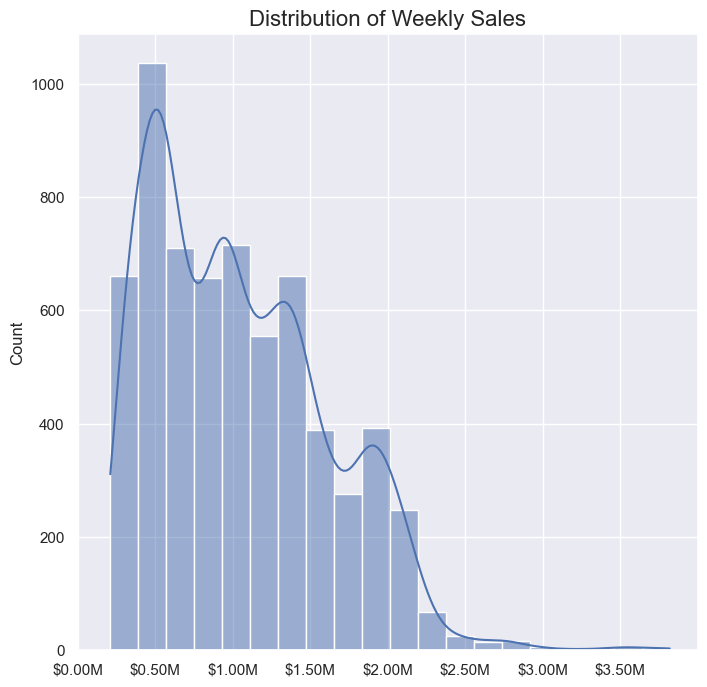

In [6]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 8))
g = sns.histplot(df["Weekly_Sales"], bins=20, kde=True)

xticks = plt.xticks()[0][:-1]
tick_labels = [f"${tick/1e6:.2f}M" for tick in xticks]
g.set_xticks(xticks)
g.set_xticklabels(tick_labels)

plt.xlabel("")
plt.title("Distribution of Weekly Sales", fontsize=16);

Most weekly sales range between $250,000 and $1,500,000. There are some outliers from $2,500,000 up to $3,500,000

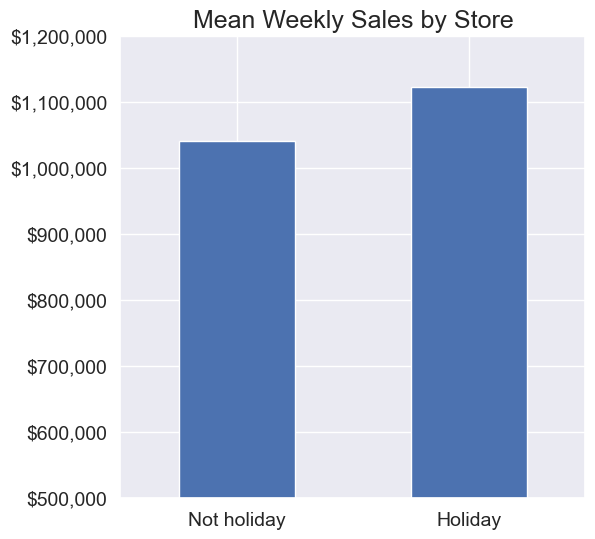

In [7]:
df_holiday = df.groupby(["Holiday_Flag"]).agg({"Weekly_Sales": "mean"})
plt.figure(figsize=(6, 6))
g = df_holiday["Weekly_Sales"].plot(kind="bar")

g.set(xlabel="", ylabel="")
y_ticks = [i for i in range(500000, 1300000, 100000)]
g.set_yticks(ticks=y_ticks, labels=[f"${i:,}" for i in y_ticks], fontsize=14)
g.set_ylim(500000, y_ticks[-1])
g.set_xticklabels(["Not holiday", "Holiday"], fontsize=14, rotation=0)

plt.title("Mean Weekly Sales by Store", fontsize=18)
plt.show()

There is a significant increase in sales during the holidays of around $80,000

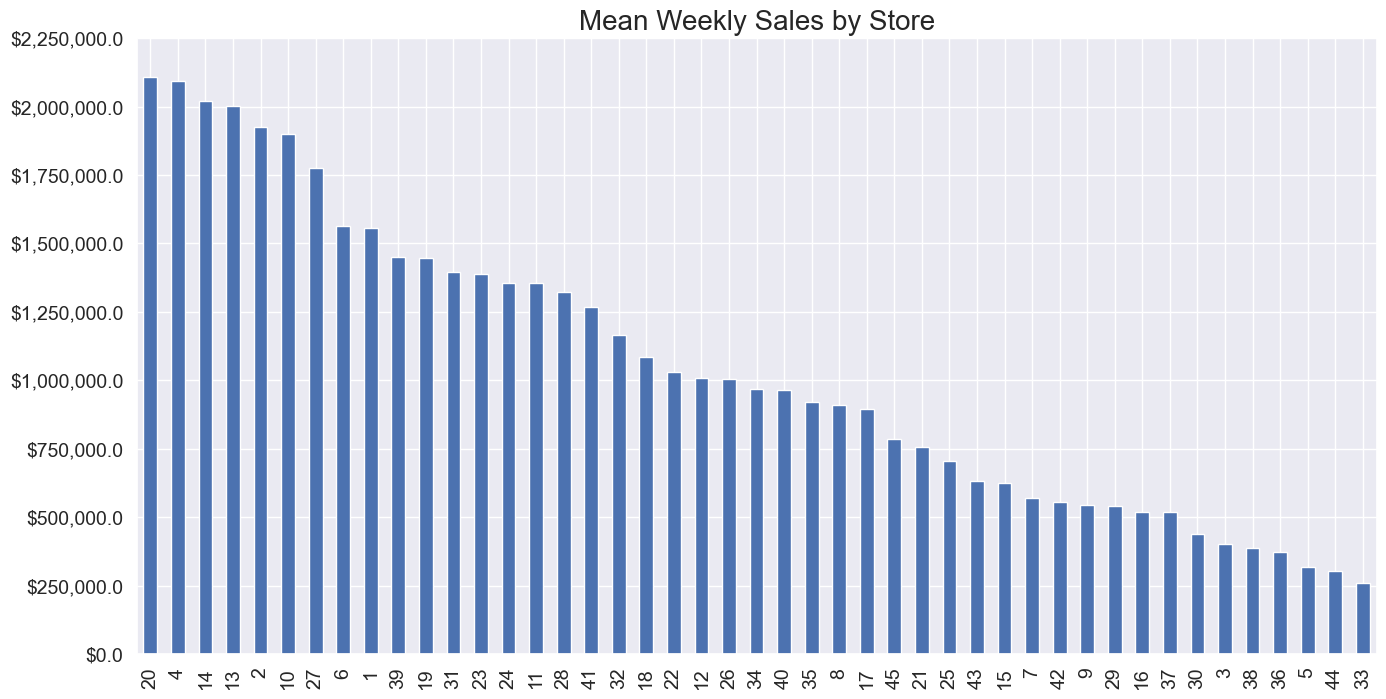

In [8]:
df_stores = df.groupby(["Store"]).agg({"Weekly_Sales": "mean"})

plt.figure(figsize=(16, 8))
g = df_stores["Weekly_Sales"].sort_values(ascending=False).plot(kind="bar")

g.set(xlabel="", ylabel="")
yticks = g.get_yticks()
g.set_yticks(ticks=yticks, labels=[f"${i:,}" for i in yticks], fontsize=14)
g.set_xticklabels(g.get_xticklabels(), fontsize=14)

plt.title("Mean Weekly Sales by Store", fontsize=20)
plt.show()

The graphic shows a wide range of mean weekly sales from $250,000 to around $2,000,000. This variation makes training a single model for all stores impractical. To address this, the following approaches can be considered:
- Process the "mean store" only for a big scale purpose.
- Analyze a single store. This analysis must be replicable for the other ones.
- Group the stores in clusters based on their mean weekly sales. (Not implemented)

### Mean Store

##### Removing Outliers

In [9]:
max_threshold = df.Weekly_Sales.quantile(0.95)
min_threshold = df.Weekly_Sales.quantile(0.05)
df_mean_store = df[(df["Weekly_Sales"] < max_threshold) & (df["Weekly_Sales"] > min_threshold)]

##### Aggregating Features

In [10]:
df_mean_store[df_mean_store.index == pd.to_datetime("05-02-2010", format="%d-%m-%Y")].head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.57,211.10,8.11
2010-02-05,3,461622.22,0,45.71,2.57,214.42,7.37
2010-02-05,5,317173.10,0,39.70,2.57,211.65,6.57
2010-02-05,6,1652635.10,0,40.43,2.57,212.62,7.26
2010-02-05,7,496725.44,0,10.53,2.58,189.38,9.01


In [11]:
df_mean_store = df_mean_store.groupby([df_mean_store.index]).agg({"Weekly_Sales": "mean", "Holiday_Flag": "first", "Temperature": "mean", "Fuel_Price": "mean", "CPI": "mean", "Unemployment": "mean"})
df_mean_store.to_csv("Mean Store Data.csv")

### Single Store

In [13]:
df_store_1 = df[df.Store == 1]
df_store_1.drop(columns=["Store"], inplace=True)
df_store_1.to_csv("Store 1 Data.csv")

C:\Users\maria\AppData\Local\Temp\ipykernel_15236\814149099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_store_1.drop(columns=["Store"], inplace=True)
